In [1]:

# Import the Python's number crunchers

from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['AAPL', 'TSLA', 'GOOG', 'FB', 'WMT']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start= '2018-1-1', end='2020-1-1')['Adj Close']
    
df.head()

,AAPL,TSLA,GOOG,FB,WMT
Date,,,,,
2018-01-02,166.804016,320.529999,1065.000000,181.419998,93.976685
2018-01-03,166.774963,317.250000,1082.479980,184.669998,94.796448
2018-01-04,167.549622,314.619995,1086.400024,184.330002,94.882233
2018-01-05,169.457214,316.579987,1102.229980,186.850006,95.444633
2018-01-08,168.827820,336.410004,1106.939941,188.279999,96.855362


In [4]:
#New dataframe with values equal to percent change from earlier day
d_returns = df.pct_change()
d_returns.head()

,AAPL,TSLA,GOOG,FB,WMT
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,-0.010233,0.016413,0.017914,0.008723
2018-01-04,0.004645,-0.008290,0.003621,-0.001841,0.000905
2018-01-05,0.011385,0.006230,0.014571,0.013671,0.005927
2018-01-08,-0.003714,0.062638,0.004273,0.007653,0.014781


In [6]:
# Construct a covariance matrix for the portfolio's daily returns with the .cov() method

cov_matrix_d = d_returns.cov()
cov_matrix_d

,AAPL,TSLA,GOOG,FB,WMT
AAPL,0.000301,0.000191,0.000179,0.000166,0.000056
TSLA,0.000191,0.001161,0.000167,0.000182,0.000073
GOOG,0.000179,0.000167,0.000272,0.000208,0.000052
FB,0.000166,0.000182,0.000208,0.000442,0.000044
WMT,0.000056,0.000073,0.000052,0.000044,0.000155


In [7]:
# Annualise the daily covariance matrix with the standard 250 trading days

cov_matrix_a = cov_matrix_d * 250
cov_matrix_a

,AAPL,TSLA,GOOG,FB,WMT
AAPL,0.075180,0.047671,0.044830,0.041524,0.013969
TSLA,0.047671,0.290300,0.041774,0.045414,0.018369
GOOG,0.044830,0.041774,0.068071,0.051920,0.013010
FB,0.041524,0.045414,0.051920,0.110428,0.010918
WMT,0.013969,0.018369,0.013010,0.010918,0.038818


In [8]:
# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [9]:
# Calculate the variance with the formula

port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
port_variance

0.04966384874499423

In [39]:
# Just converting the variance float into a percentage

print(str(round(port_variance, 4) * 100) + '%')

4.97%


In [25]:
# The standard deviation of a portfolio is just a square root of its variance

port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
port_volatility

0.22285387307604557

In [40]:
print(str(round(port_volatility, 4) * 100) + '%')

22.29%


In [41]:
# Proof that Standard deviation of a portfolio is just a square root of its variance

np.dot(weights.T, np.dot(cov_matrix_a, weights)) ** 0.5

0.22285387307604557

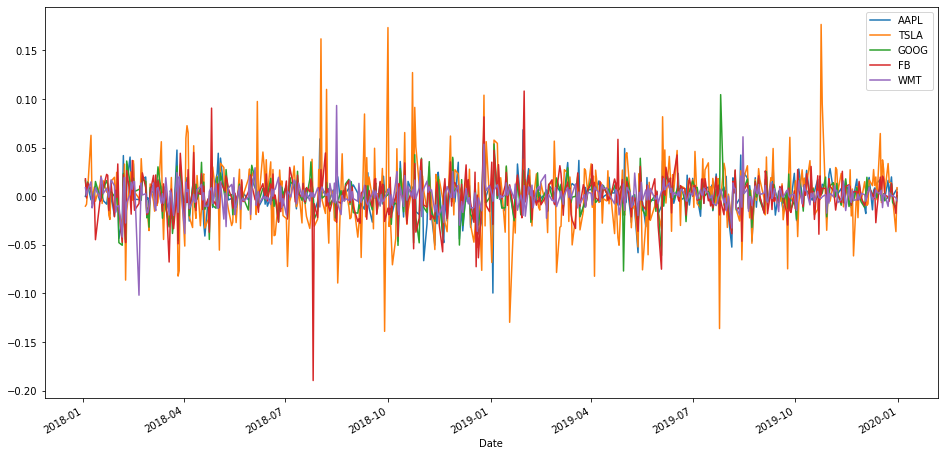

In [42]:
%matplotlib inline
d_returns.plot(figsize=(16,8))

In [43]:
# basic stats on daily returns

d_returns.describe()

,AAPL,TSLA,GOOG,FB,WMT
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.001273,0.001105,0.000589,0.000471,0.000537
std,0.017341,0.034076,0.016501,0.021017,0.012461
min,-0.099607,-0.139015,-0.076966,-0.189609,-0.101832
25%,-0.006520,-0.015589,-0.006513,-0.008989,-0.005137
50%,0.001608,-0.000524,0.000644,0.000976,0.001014
75%,0.010310,0.017583,0.009819,0.011516,0.007092
max,0.070422,0.176692,0.104485,0.108164,0.093327


In [44]:
# correlation matrix of daily returns

d_returns.corr()

,AAPL,TSLA,GOOG,FB,WMT
AAPL,1.000000,0.322688,0.626666,0.455735,0.258584
TSLA,0.322688,1.000000,0.297166,0.253645,0.173042
GOOG,0.626666,0.297166,1.000000,0.598848,0.253082
FB,0.455735,0.253645,0.598848,1.000000,0.166755
WMT,0.258584,0.173042,0.253082,0.166755,1.000000


In [45]:
# annual standard deviation of Apple stock 

d_returns['AAPL'].std() * np.sqrt(250)

0.27419016663675294

In [46]:
percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'

In [47]:
print('Variance of Portfolio is {}, Portfolio Risk is {}'
      .format(percent_var, percent_vols))

Variance of Portfolio is 4.97%, Portfolio Risk is 22.29%
